<a href="https://colab.research.google.com/github/ADebor/adebor.github.io/blob/master/notebooks/syst0002_tp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP8 - Notebook de support

## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline

## Exercice 2

In [3]:
# transformée de Fourier analytique (cfr. TP)
def tf_2(f, period):
  return period * np.sinc(f*period)

In [4]:
f = np.linspace(-1., 1., 1000)

In [5]:
# cas 1 : T = 10
T = 10
y_10 = tf_2(f, T)

In [6]:
# cas 2 : T = 1
T = 1
y_1 = tf_2(f, T)
#T = 1
#y_1 = tf_2(f, T)

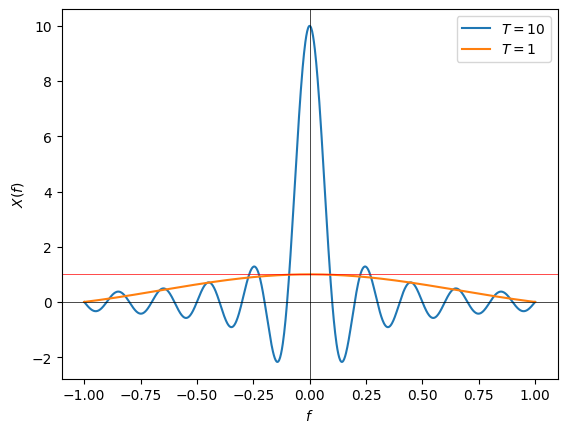

In [7]:
plt.plot(f, y_10, f, y_1)
plt.legend(["$T=10$", "$T=1$"])
plt.xlabel("$f$")
plt.ylabel("$X(f)$")
plt.axhline(0, color='black', linewidth=.5)
plt.axhline(1, color='red', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

In [8]:
# Transformée de Fourier du delta de Dirac (visualisation)

@widgets.interact(T=(1e-7, 10, 1e-6))
def plot(T):
  y = 1/T*tf_2(f, T)
  plt.plot(f, y)
  plt.legend(["$T=10$", "$T_{variant}$"])
  plt.xlabel("$f$")
  plt.ylabel("$X(f)$")
  plt.axhline(0, color='black', linewidth=.5)
  plt.axhline(1, color='red', linewidth=.5)
  plt.axvline(0, color='black', linewidth=.5)
  plt.show()

interactive(children=(FloatSlider(value=4.9999991, description='T', max=10.0, min=1e-07, step=1e-06), Output()…

## Exercice 3

In [9]:
# ex3 : A=1, T=10
A = 1
T = 10

# amplitude
def tf_amp_ex3(f):
  return A * T * np.sinc(f * T)

# phase
def tf_phase_ex3(f):
  return -np.pi * T * f

f = np.linspace(-.5, .5, 1000)
amplitude = tf_amp_ex3(f)
phase = tf_phase_ex3(f)

Text(0.5, 0.98, '$X(f)$')

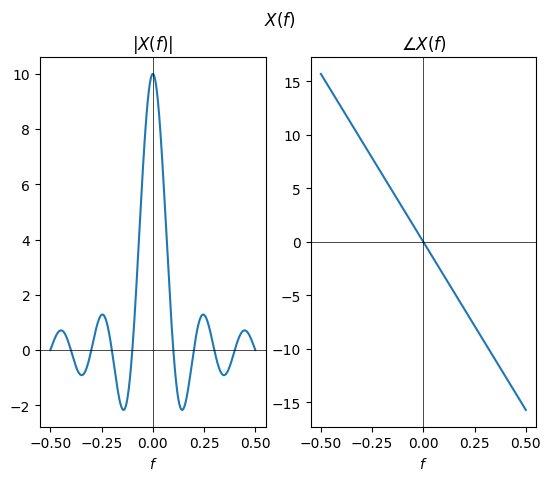

In [10]:
plt.subplot(1, 2, 1)
plt.plot(f, amplitude)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.title("$|X(f)|$")
plt.xlabel("$f$")

plt.subplot(1, 2, 2)
plt.plot(f, phase)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.title("$\\angle{X(f)}$")
plt.xlabel("$f$")

plt.suptitle("$X(f)$")

## Exercice 5

Nous allons ici approximer la transformée de Fourier en utilisant la fonction `fft` de Numpy. Cette fonction implémente l'algorithme de la *Fast Fourier Transform* afin de calculer la transformée de Fourier discrète. En pratique, une méthode numérique ne pouvant pas traîter de signaux continus, le signal doit être échantillonné et la transformée de Fourier continue vue au cours ne peut plus être appliquée. Ces considérations ne sont pas abordées au cours de SYST0002, mais il est bon d'en avoir conscience. Plus d'informations [ici](https://fr.wikipedia.org/wiki/Transformation_de_Fourier_discr%C3%A8te).

Text(0, 0.5, '$x(t)$')

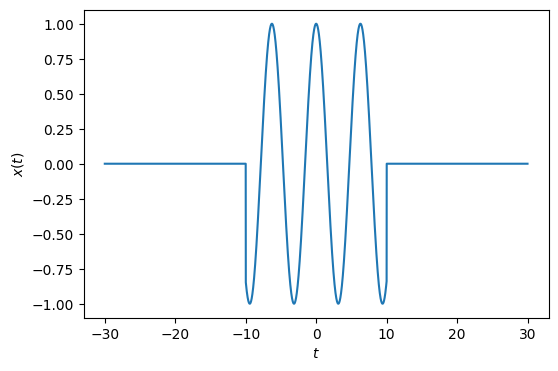

In [34]:
# fonction définie dans l'exercice
def bounded_cos(t):
  T = 20
  y = np.cos(t)
  y = [y if t<=T/2 and t>-T/2 else 0 for y, t in zip(y, t)]
  return np.asarray(y)

# fréquence d'échantillonnage
sr = 2000

# intervalle d'échantillonnage
ts = 1.0/sr

# instants d'échantillonnage
t = np.arange(-30, 30, ts)

# fonction échantillonnée
x = bounded_cos(t)

# visualisation
plt.figure(figsize=(6, 4))
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")

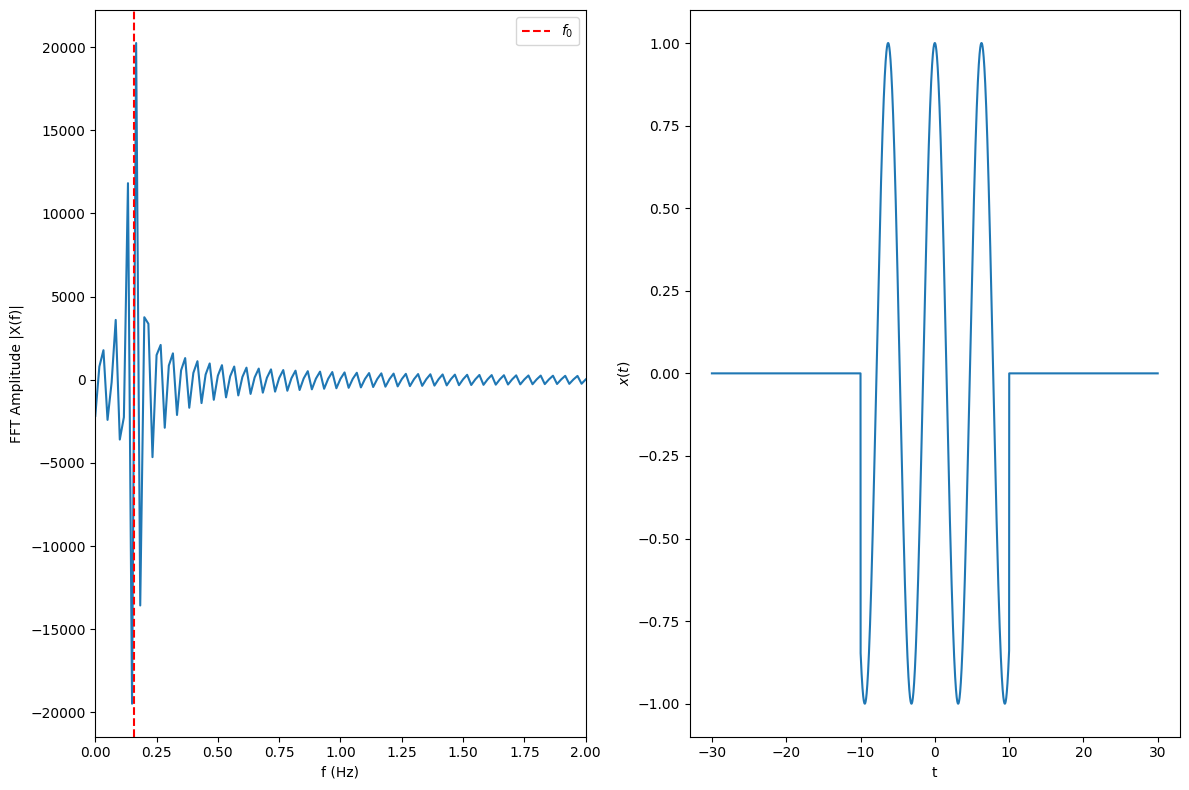

In [39]:
# FFT
X = np.fft.fft(x)

# nombre de points renvoyés par la FFT
N = len(X)

# reconstruction des fréquences discrètes
n = np.arange(N)
T = N/sr
freq = n/T

# visualisation
plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.plot(freq, X)
plt.xlabel('f (Hz)')
plt.ylabel('FFT Amplitude |X(f)|')
plt.xlim(0, 2)
plt.axvline(1/(2*np.pi), color='r', label='$f_0$', ls='--')
plt.legend()

plt.subplot(122)
plt.plot(t, np.fft.ifft(X))
plt.xlabel('t')
plt.ylabel('$x(t)$')
plt.tight_layout()

plt.show()